# A.	Explorasi Data Analisis #

## 1.	Memahami Struktur Data ##

a)	Import Library

In [327]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

b)	Loading Data

In [328]:
df = pd.read_excel("Tokokita.xlsx")

c:\Users\Dicky Zulfikar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


c)	Menampilkan Sample Data

In [329]:
df.head()

Tanggal   Kode Barang                          Nama Barang  \
0 2020-01-03  8.992779e+12  GLADE GANTUNG NOUNTAIN PINE 75+10GR   
1 2020-01-04  2.011040e+05                     SARDEN ABC KECIL   
2 2020-01-06  2.028080e+05              BANGO KECAP BOTOL 135ml   
3 2020-01-08  8.992747e+12              VIXAL HARUM SEGAR 780ML   
4 2020-01-10  7.000090e+05      RINSO DETERGENT ANTI NODA 800GR   

           Kategori  Sat    Qty  Jual(Rp)  Beli(Rp)  Penjualan  Pembelian  \
0           PEWANGI  pcs   77.0   11000.0    9600.0   847000.0   739200.0   
1            DAGING  can  244.0   10000.0    7500.0  2440000.0  1830000.0   
2             KECAP  btl  100.0   11000.0    9570.0  1100000.0   957000.0   
3  PEMBERSIH LANTAI  pcs  169.0   17000.0   15290.0  2873000.0  2584010.0   
4          DETERGEN  pcs   50.0   21800.0   19580.0  1090000.0   979000.0   

      Region           City  
0  West Java          Depok  
1    Jakarta  North Jakarta  
2    Jakarta  South Jakarta  
3    Jakarta  North Jakarta  
4  West Java         Bekasi

d)	Menampilkan Informasi Dataset

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      400 non-null    datetime64[ns]
 1   Kode Barang  400 non-null    float64       
 2   Nama Barang  400 non-null    object        
 3   Kategori     400 non-null    object        
 4   Sat          400 non-null    object        
 5   Qty          400 non-null    float64       
 6   Jual(Rp)     399 non-null    float64       
 7   Beli(Rp)     399 non-null    float64       
 8   Penjualan    400 non-null    float64       
 9   Pembelian    400 non-null    float64       
 10  Region       801 non-null    object        
 11  City         801 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 75.2+ KB


## 2.	Memeriksa Nilai yang Hilang (Missing Values) dan Data Duplikat ##

a)	Identifikasi jumlah nilai yang hilang di setiap kolom

In [331]:
df.isnull().sum()

Tanggal        401
Kode Barang    401
Nama Barang    401
Kategori       401
Sat            401
Qty            401
Jual(Rp)       402
Beli(Rp)       402
Penjualan      401
Pembelian      401
Region           0
City             0
dtype: int64

b)	Menangani nilai yang hilang

In [332]:
# remove all the rows that contain a missing value
df = df.dropna()
df.isnull().sum()

Tanggal        0
Kode Barang    0
Nama Barang    0
Kategori       0
Sat            0
Qty            0
Jual(Rp)       0
Beli(Rp)       0
Penjualan      0
Pembelian      0
Region         0
City           0
dtype: int64

c)	Memeriksa data duplikat 

In [333]:
df[df.duplicated()]

Empty DataFrame
Columns: [Tanggal, Kode Barang, Nama Barang, Kategori, Sat, Qty, Jual(Rp), Beli(Rp), Penjualan, Pembelian, Region, City]
Index: []

## 3.	Memahami Distribusi Data ##

a)	Descriptive Statistics

In [334]:
df.describe()

Tanggal   Kode Barang         Qty       Jual(Rp)  \
count                            399  3.990000e+02  399.000000     399.000000   
mean   2020-10-03 05:50:04.511278080  5.034385e+12  135.255639   22305.764411   
min              2020-01-03 00:00:00  1.000010e+05   15.000000     750.000000   
25%              2020-06-11 12:00:00  5.012245e+05   81.500000    3750.000000   
50%              2020-10-24 00:00:00  8.886008e+12  134.000000   12000.000000   
75%              2021-02-05 00:00:00  8.996007e+12  192.500000   23000.000000   
max              2021-04-20 00:00:00  8.993189e+13  250.000000  750000.000000   
std                              NaN  6.290020e+12   66.288010   62102.078630   

            Beli(Rp)     Penjualan     Pembelian  
count     399.000000  3.990000e+02  3.990000e+02  
mean    18796.548037  3.216136e+06  2.713075e+06  
min       300.000000  1.875000e+04  1.010000e+04  
25%      2958.333333  4.210000e+05  3.168750e+05  
50%      9300.000000  1.155000e+06  9.646000e+05  
75%     17812.500000  2.965050e+06  2.377072e+06  
max    675000.000000  1.695000e+08  1.525500e+08  
std     55438.083715  1.202097e+07  1.078004e+07

## 4.	Menghapus Kolom Yang Tidak Perlu  ##

In [335]:
df.drop(['Kode Barang', 'Nama Barang', 'Sat'], axis=1, inplace=True)
df

Tanggal          Kategori    Qty  Jual(Rp)      Beli(Rp)  Penjualan  \
0   2020-01-03           PEWANGI   77.0   11000.0   9600.000000   847000.0   
1   2020-01-04            DAGING  244.0   10000.0   7500.000000  2440000.0   
2   2020-01-06             KECAP  100.0   11000.0   9570.000000  1100000.0   
3   2020-01-08  PEMBERSIH LANTAI  169.0   17000.0  15290.000000  2873000.0   
4   2020-01-10          DETERGEN   50.0   21800.0  19580.000000  1090000.0   
..         ...               ...    ...       ...           ...        ...   
395 2021-04-17             SNACK  132.0    9000.0   7500.000000  1188000.0   
396 2021-04-18             SNACK  131.0    2000.0   1630.000000   262000.0   
397 2021-04-18           PEWANGI  206.0    1500.0    916.666667   309000.0   
398 2021-04-20             POPOK   67.0   20000.0  14300.000000  1340000.0   
399 2021-04-20              TISU  207.0   11000.0   7800.000000  2277000.0   

        Pembelian     Region             City  
0    7.392000e+05  West Java            Depok  
1    1.830000e+06    Jakarta    North Jakarta  
2    9.570000e+05    Jakarta    South Jakarta  
3    2.584010e+06    Jakarta    North Jakarta  
4    9.790000e+05  West Java           Bekasi  
..            ...        ...              ...  
395  9.900000e+05    Jakarta    North Jakarta  
396  2.135300e+05    Jakarta  Central Jakarta  
397  1.888333e+05    Jakarta     West Jakarta  
398  9.581000e+05    Jakarta     East Jakarta  
399  1.614600e+06    Jakarta     East Jakarta  

[399 rows x 9 columns]

## 5.	Mengubah Tipe Data ##

In [336]:
# Mengubah tipe data dari float64 ke int
df['Qty'] = df['Qty'].astype(int)
df['Jual(Rp)'] = df['Jual(Rp)'].astype(int)
df['Beli(Rp)'] = df['Beli(Rp)'].astype(int)
df['Penjualan'] = df['Penjualan'].astype(int)
df['Pembelian'] = df['Pembelian'].astype(int)

print(df.dtypes)

Tanggal      datetime64[ns]
Kategori             object
Qty                   int32
Jual(Rp)              int32
Beli(Rp)              int32
Penjualan             int32
Pembelian             int32
Region               object
City                 object
dtype: object


## 6.	Analisis Korelasi Antar Variabel ##

a)	Menghitung korelasi

In [337]:
# Pilih kolom numerik
df_numerik = df[['Qty', 'Jual(Rp)', 'Beli(Rp)', 'Penjualan', 'Pembelian']]

# Menghitung matriks korelasi
korelasi_matrix = df_numerik.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(korelasi_matrix)

Matriks Korelasi:
                Qty  Jual(Rp)  Beli(Rp)  Penjualan  Pembelian
Qty        1.000000  0.048500  0.046577   0.188084   0.180143
Jual(Rp)   0.048500  1.000000  0.997641   0.903781   0.901388
Beli(Rp)   0.046577  0.997641  1.000000   0.905602   0.907216
Penjualan  0.188084  0.903781  0.905602   1.000000   0.998179
Pembelian  0.180143  0.901388  0.907216   0.998179   1.000000


b)	Visualisasi korelasi (heatmap)

In [338]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


## 7.	Menyimpan Data Setelah Proses Pembersihan ##

In [339]:
df.to_excel('Tokokita_clean.xlsx', index=False)

# Visualisasi Data #

1. Bagaimana Tren Penjualan Dan Pembelian Dalam Per Bulan?

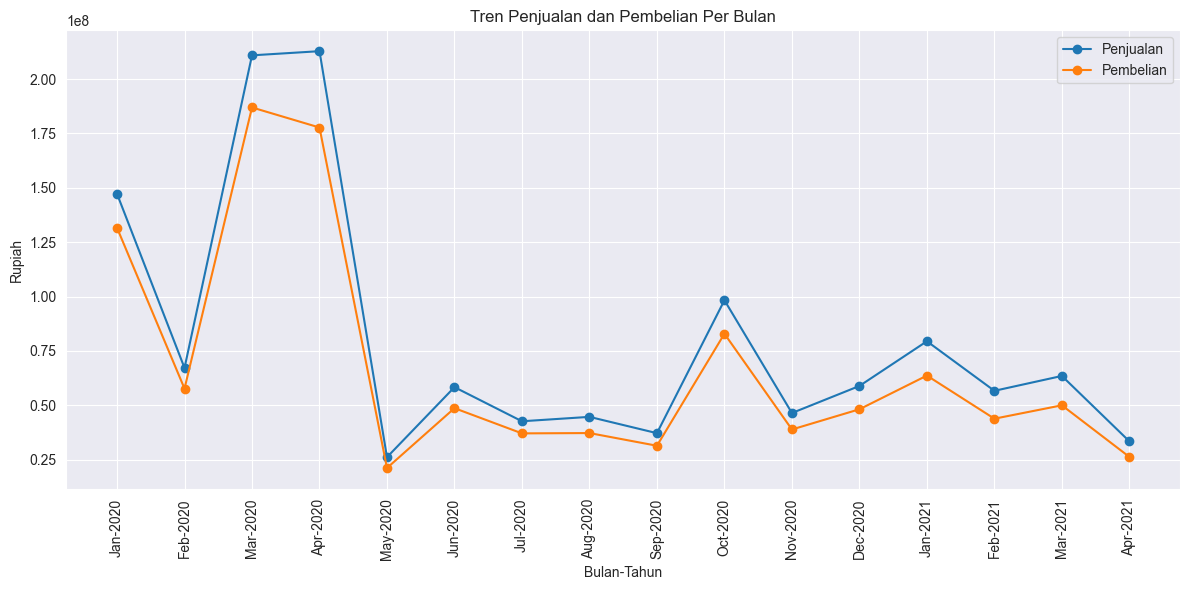

In [340]:
# Mengonversi kolom Tanggal ke format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Membuat kolom 'Month-Year' dalam format 'Jan-2020'
df['Month-Year'] = df['Tanggal'].dt.strftime('%b-%Y')

# Mengelompokkan berdasarkan Month-Year, lalu menjumlahkan Penjualan dan Pembelian
# Menggunakan 'Tanggal' untuk pengurutan yang benar
monthly_data = df.groupby(['Month-Year'])[['Penjualan', 'Pembelian']].sum().reset_index()

# Mengurutkan berdasarkan kolom 'Tanggal' untuk memastikan urutan bulan yang benar
monthly_data['Tanggal'] = pd.to_datetime(df.groupby('Month-Year')['Tanggal'].min().values)
monthly_data = monthly_data.sort_values('Tanggal')

# Membuat line plot untuk Penjualan dan Pembelian
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month-Year'], monthly_data['Penjualan'], label='Penjualan', marker='o')
plt.plot(monthly_data['Month-Year'], monthly_data['Pembelian'], label='Pembelian', marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rupiah')
plt.title('Tren Penjualan dan Pembelian Per Bulan')
plt.xticks(rotation=90)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


2. Produk Manakah Dengan Penjualan Dan Pembelian Terbanyak?

C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_8688\2364052219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Penjualan', y='Kategori', data=sales_per_category, palette='coolwarm', orient='h')


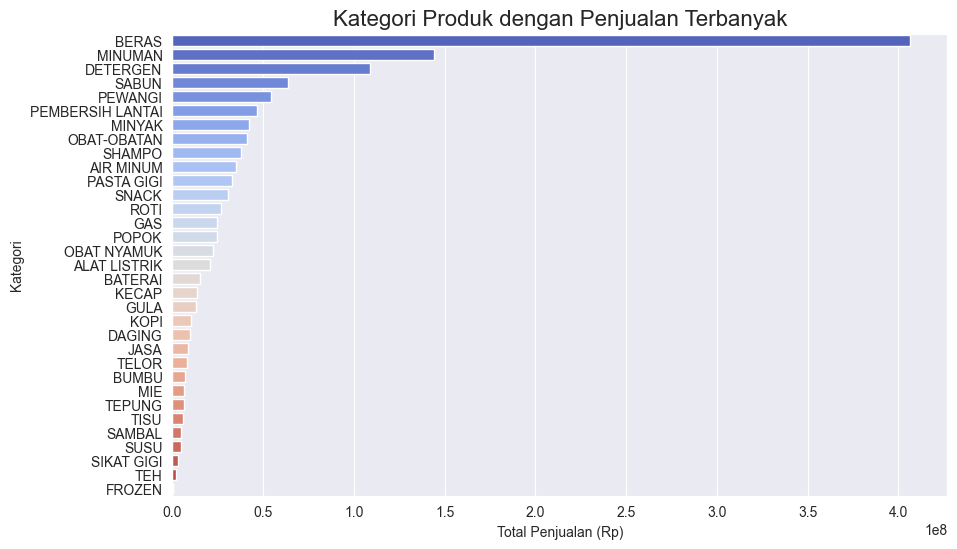

In [341]:
# Menghitung total penjualan (Qty) per kategori
sales_per_category = df.groupby('Kategori')['Penjualan'].sum().reset_index()

# Mengurutkan berdasarkan jumlah penjualan
sales_per_category = sales_per_category.sort_values(by='Penjualan', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Penjualan', y='Kategori', data=sales_per_category, palette='coolwarm', orient='h')

# Menambahkan judul dan label
plt.title('Kategori Produk dengan Penjualan Terbanyak', fontsize=16)
plt.xlabel('Total Penjualan (Rp)')
plt.ylabel('Kategori')
plt.show()

In [342]:
# Menghitung total pembelian (Qty) per kategori
purchases_per_category = df.groupby('Kategori')['Qty'].sum().reset_index()

# Mengurutkan berdasarkan jumlah pembelian
purchases_per_category = purchases_per_category.sort_values(by='Qty', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Qty', y='Kategori', data=purchases_per_category, palette='viridis', orient='h')

# Menambahkan judul dan label
plt.title('Kategori Produk dengan Pembelian Terbanyak', fontsize=16)
plt.xlabel('Total Pembelian (Qty)')
plt.ylabel('Kategori')
plt.show()

C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_8688\1892499456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Kategori', data=purchases_per_category, palette='viridis', orient='h')


3. Bagaimana Distribusi Penjualan dan Pembelian Berdasarkan Kota?

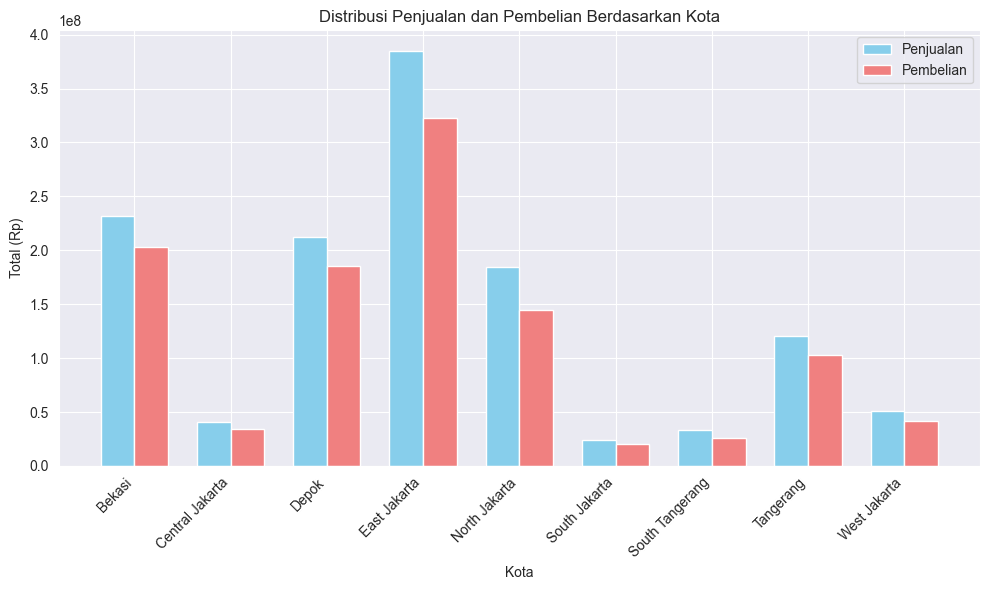

In [343]:
# Kelompokkan data berdasarkan kota dan hitung total penjualan dan pembelian
penjualan_per_kota = df.groupby('City')['Penjualan'].sum().reset_index()
pembelian_per_kota = df.groupby('City')['Pembelian'].sum().reset_index()

# Pastikan urutan kota sama di kedua data
penjualan_per_kota = penjualan_per_kota.sort_values('City')
pembelian_per_kota = pembelian_per_kota.sort_values('City')

# Buat sumbu X untuk masing-masing kota
ind = np.arange(len(penjualan_per_kota))  # lokasi bar pada sumbu X
width = 0.35  # lebar bar

# Buat plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar untuk penjualan
bars1 = ax.bar(ind - width/2, penjualan_per_kota['Penjualan'], width, label='Penjualan', color='skyblue')

# Plot bar untuk pembelian
bars2 = ax.bar(ind + width/2, pembelian_per_kota['Pembelian'], width, label='Pembelian', color='lightcoral')

# Tambahkan label, judul, dan sumbu
ax.set_xlabel('Kota')
ax.set_ylabel('Total (Rp)')
ax.set_title('Distribusi Penjualan dan Pembelian Berdasarkan Kota')
ax.set_xticks(ind)
ax.set_xticklabels(penjualan_per_kota['City'], rotation=45, ha='right')
ax.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


In [344]:
def tentukan_subkategori(kategori):
    kategori = kategori.strip().upper()  # Menghapus spasi di sekitar dan mengubah ke uppercase
    if kategori in ['BERAS', 'GULA', 'TELOR', 'MINYAK', 'TEPUNG', 'MIE']:
        return 'Kebutuhan Pokok'
    elif kategori in ['AIR MINUM', 'MINUMAN', 'KOPI', 'TEH', 'ROTI', 'SNACK', 'SUSU', 'SAMBAL', 'KECAP', 'BUMBU', 'DAGING', 'FROZEN']:
        return 'Minuman & Makanan'
    elif kategori in ['DETERGEN', 'PEMBERSIH LANTAI', 'SABUN', 'TISU', 'GAS', 'ALAT LISTRIK', 'BATERAI']:
        return 'Kebutuhan Rumah Tangga'
    elif kategori in ['OBAT-OBATAN', 'OBAT NYAMUK', 'SHAMPO', 'PASTA GIGI', 'SIKAT GIGI', 'PEWANGI']:
        return 'Kesehatan & Kebersihan'
    elif kategori == 'POPOK':
        return 'Perlengkapan Bayi'
    else:
        return 'Lainnya'

# Menambahkan kolom Subkategori berdasarkan kategori
df['Subkategori'] = df['Kategori'].apply(tentukan_subkategori)

# Menampilkan data dengan kolom Subkategori baru
print(df[['Kategori', 'Subkategori']].drop_duplicates())


             Kategori             Subkategori
0             PEWANGI  Kesehatan & Kebersihan
1              DAGING       Minuman & Makanan
2               KECAP       Minuman & Makanan
3    PEMBERSIH LANTAI  Kebutuhan Rumah Tangga
4            DETERGEN  Kebutuhan Rumah Tangga
6              MINYAK         Kebutuhan Pokok
7          PASTA GIGI  Kesehatan & Kebersihan
8           AIR MINUM       Minuman & Makanan
10            MINUMAN       Minuman & Makanan
17                MIE         Kebutuhan Pokok
18        OBAT NYAMUK  Kesehatan & Kebersihan
19                GAS  Kebutuhan Rumah Tangga
22               KOPI       Minuman & Makanan
24              BUMBU       Minuman & Makanan
36              BERAS         Kebutuhan Pokok
41             FROZEN       Minuman & Makanan
53       ALAT LISTRIK  Kebutuhan Rumah Tangga
59               GULA         Kebutuhan Pokok
96            BATERAI  Kebutuhan Rumah Tangga
101       OBAT-OBATAN  Kesehatan & Kebersihan
149              JASA             

4. Distribusi Penjualan Berdasarkan Subkategori

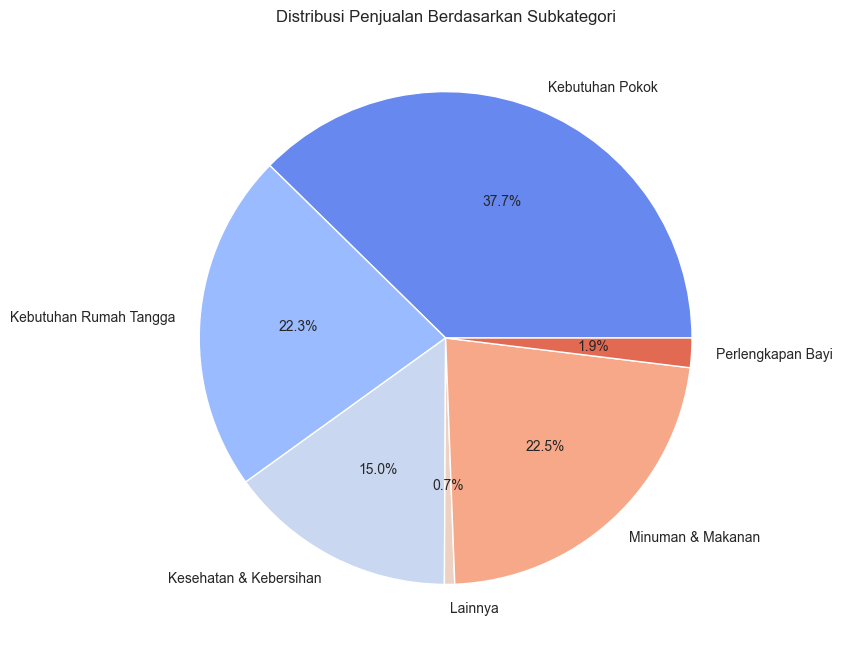

In [345]:
plt.figure(figsize=(8, 8))
subkategori_sales = df.groupby('Subkategori')['Penjualan'].sum()
plt.pie(subkategori_sales, labels=subkategori_sales.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(subkategori_sales)))
plt.title('Distribusi Penjualan Berdasarkan Subkategori')
plt.show()


Tren Penjualan per SubKategori

In [346]:
# Mengonversi kolom Tanggal ke format datetime jika belum
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Menambahkan kolom 'Month-Year' dalam format 'Jan-2020'
df['Month-Year'] = df['Tanggal'].dt.to_period('M')

# Mengelompokkan data berdasarkan Subkategori dan Month-Year, lalu menghitung total penjualan
tren_subkategori = df.groupby(['Subkategori', 'Month-Year'])['Penjualan'].sum().reset_index()

# Mengubah 'Month-Year' ke format string agar dapat digunakan dalam plot
tren_subkategori['Month-Year'] = tren_subkategori['Month-Year'].astype(str)

# Mengatur gaya visualisasi Seaborn
sns.set_style("whitegrid")

# Membuat line plot untuk tren per subkategori
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month-Year', y='Penjualan', hue='Subkategori', data=tren_subkategori, marker='o')

plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Penjualan (Rp)')
plt.title('Tren Penjualan per Subkategori')
plt.xticks(rotation=45)
plt.legend(title='Subkategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [347]:
# Menambahkan kolom Keuntungan
df['Keuntungan'] = df['Jual(Rp)'] - df['Beli(Rp)']

# Menghitung total keuntungan
total_keuntungan = df['Keuntungan'].sum()
print(f'Total Keuntungan: {total_keuntungan:.2f} Rp')

# Jika ada kerugian (nilai negatif)
total_kerugian = df[df['Keuntungan'] < 0]['Keuntungan'].sum()
print(f'Total Kerugian: {total_kerugian:.2f} Rp')


Total Keuntungan: 1400188.00 Rp
Total Kerugian: 0.00 Rp


6. Analisis Rata-rata Keuntungan per Kategori

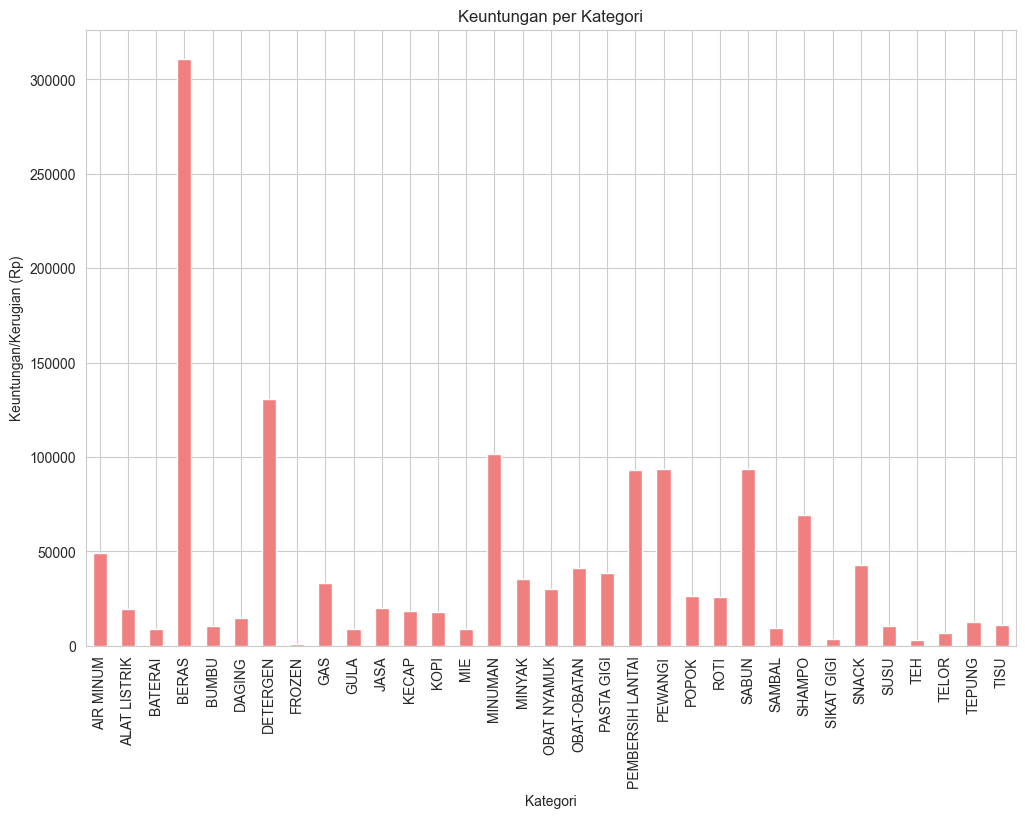

In [348]:
# Mengelompokkan berdasarkan Kategori
keuntungan_kerugian_per_kategori = df.groupby('Kategori')['Keuntungan'].sum()

plt.figure(figsize=(12, 8))
keuntungan_kerugian_per_kategori.plot(kind='bar', color=['lightcoral' if x >= 0 else 'red' for x in keuntungan_kerugian_per_kategori])
plt.title('Keuntungan per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Keuntungan/Kerugian (Rp)')
plt.xticks(rotation=90)
plt.show()


7. Analisis Tren Keuntungan per Bulan

In [349]:
# Mengonversi kolom Tanggal ke format datetime jika belum
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Mengelompokkan berdasarkan bulan dan tahun, lalu menghitung total keuntungan
df['Month-Year'] = df['Tanggal'].dt.to_period('M')
tren_keuntungan_per_bulan = df.groupby('Month-Year')['Keuntungan'].sum().reset_index()

# Mengubah 'Month-Year' ke format string agar dapat digunakan dalam plot
tren_keuntungan_per_bulan['Month-Year'] = tren_keuntungan_per_bulan['Month-Year'].astype(str)

# Membuat line plot untuk tren keuntungan
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.lineplot(x='Month-Year', y='Keuntungan', data=tren_keuntungan_per_bulan, marker='o', color='gray')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Keuntungan (Rp)')
plt.title('Tren Keuntungan Per Bulan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8. Analisis Penjualan Berdasarkan Hari dalam Seminggu

In [350]:
# Menambahkan kolom hari dalam seminggu
df['DayOfWeek'] = df['Tanggal'].dt.day_name()

# Menghitung total penjualan per hari dalam seminggu
sales_per_day = df.groupby('DayOfWeek')['Penjualan'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_day.index, y=sales_per_day.values, palette='coolwarm')

# Menambahkan judul dan label
plt.title('Penjualan Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari')
plt.ylabel('Total Penjualan (Rp)')
plt.show()


C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_8688\1910596135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_day.index, y=sales_per_day.values, palette='coolwarm')
